In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist 

In [2]:
def PCA(X , num_components):
     
    # Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)
     
    # Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    # Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    #sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    # Sort Eigenvalues in descending order
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [3]:
data = pd.read_csv("CC GENERAL.csv")
data.dropna(inplace = True)

#x = data[["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]]

x = data.iloc[:, 1:17]

pca = PCA(x, 2)
pca

array([[ 4391.44751025,   911.24746572],
       [-4044.63420042, -2565.16017529],
       [-1418.39482731, -1924.55718387],
       ...,
       [ 4444.59286857,   905.46750679],
       [ 4855.4227417 ,  1016.38464476],
       [ 3685.09060485,  1559.63542498]])

In [4]:
def kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # Randomly choosing Centroids 
    centroids = x[idx, :]
     
    # Finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    # Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    # Repeating the above steps for a defined number of iterations
        # .... #


    # Randomly pick k data points as our initial Centroids.
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) # Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [5]:
label = kmeans(pca, 10, 1000)

label

array([0, 3, 5, ..., 0, 0, 0], dtype=int64)

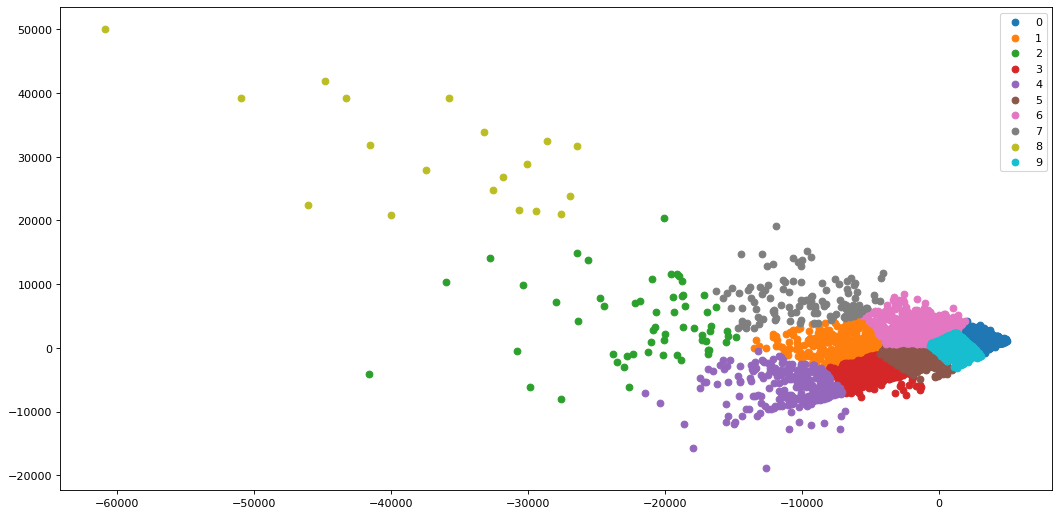

In [6]:
# Visualize
u_labels = np.unique(label)

figure(figsize=(16, 8), dpi=80)

for i in u_labels:
    plt.scatter(pca[label == i , 0] , pca[label == i , 1] , label = i)
plt.legend()
plt.show()